# Normal Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [3]:
def get_continuous_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(int(np.floor(xmin)), int(np.ceil(xmax)) + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [4]:
def plot_continuous_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pdf = f.pdf(x_axis, **kwargs)
    
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(x_axis, pdf, alpha = 0.7, color = "k")
    ax.fill_between(x_axis, pdf, alpha = 0.4)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    
    plt.xticks(get_continuous_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_continuous_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_continuous_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

La **normal distribution** descrive una curva simmetrica, unimodale e a forma di campana. E' governata da due parametri: la *mean* e la *standard deviation*.

Vige la **68-95-99.7% rule**, secondo la quale:
- Il *68%* dei dati si trova al massimo ad una *SD* dalla *mean*. $[\mu-\sigma,\mu+\sigma]$
- Il *95%* dei dati si trova al massimo a due *SD* dalla *mean*. $[\mu-2\sigma,\mu+2\sigma]$
- Il *99.7%* dei dati si trova al massimo a tre *SD* dalla *mean*. $[\mu-3\sigma,\mu+3\sigma]$

**PDF**

$$\large f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Se la media è nulla e la varianza è unitaria, si parla di **standard normal distribution**, la cui *PDF* è pari a:

$$\large f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

Ogni variabile aleatoria normale può essere standardizzata; tale processo prende il nome di **Z-transformation**.

Chiaramente sottrarre alla variabile la propria media costringe la variabile stessa ad avere nuova media nulla, e dividere per la deviazione standard costringe la variabile ad avere nuova deviazione standard unitaria.

$$\large Z=\frac{X-\mu_X}{\sigma_X}\sim N(0,1)$$

---

La verifica di normalità è fondamentale, in quando molte tecniche di inferenza assumono di effettuare dei sample da popolazioni distribuite seguendo l'andamento normale.

In [6]:
def qq_plot(x, y, xlabel = "X", ylabel = "Y"):
    fig, ax = plt.subplots(figsize = (6, 4))
    quantiles = np.linspace(0, 1, min(len(x), len(y)))
    x_quantiles = np.quantile(x, quantiles, interpolation = "nearest")
    y_quantiles = np.quantile(y, quantiles, interpolation = "nearest")
    ax.plot([0,1],[0,1], color="k", alpha=0.7, transform=ax.transAxes,
           linestyle = "--", linewidth = 1.5)
    ax.scatter(x_quantiles, y_quantiles,
               color = "cornflowerblue", s = 100, edgecolor = "k",
               linewidth = 1.5, alpha = 0.5)
    plt.xlabel(f"{xlabel} Quantiles")
    plt.ylabel(f"{ylabel} Quantiles")
    plt.show()

Innanzitutto si ordinano i dati dal più piccolo al più grande e poi li si plottano contro i quantili della standard normal.

In [7]:
data = [7.9, 5.78, 3.89, 4.75, 4.75, 5.2, 5.8, 6.33, 7.21]
data.sort()
data

[3.89, 4.75, 4.75, 5.2, 5.78, 5.8, 6.33, 7.21, 7.9]

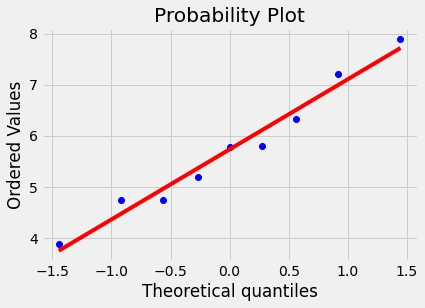

In [8]:
x = stats.probplot(data, dist="norm", plot = plt)

Se la distribuzione delle osservazioni segue l'andamento rettilineo evidenziato, vuol dire che la popolazione che ha generato quel sample segue molto probabilmente un andamento normale.

---

#### Probability Density Function

Mean: 0.0
Median: 0.0
Variance: 1.0
Standard Deviation: 1.0


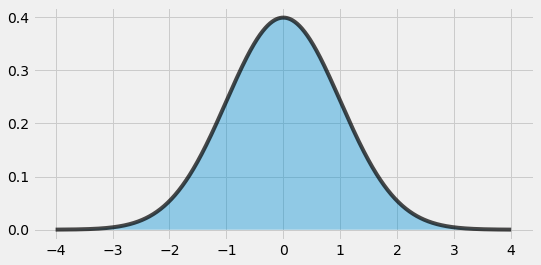

In [9]:
mu = 0
sigma = 1

x_axis = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

plot_continuous_distribution(f = stats.norm,
                             x_axis = x_axis,
                             loc = mu,
                             scale = sigma)

---

#### RVS

Min: -3.9991271114380234
Mean: -0.005505665982418366
Median: -0.009716837514984353
Max: 3.139146379667345
Variance: 1.0194837753207362
Standard Deviation: 1.0096948921930506


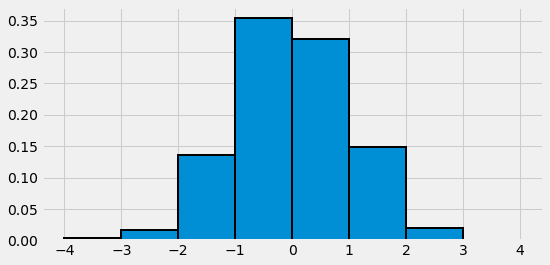

In [10]:
mu = 0
sigma = 1

sample = sample_continuous_distribution(f = stats.norm,
                                        size = 1000,
                                        loc = mu,
                                        scale = sigma)

---

**[Esempio]** Supponiamo che l'altezza di una donna americana sia modellabile con una distribuzione normale a media 162.2 e deviazione standard 6.8. Qual è la probabilità che una donna estratta a caso sia più alta di 170.5 cm?

In [11]:
stats.norm.sf(x = 170.5, loc = 162.2, scale = 6.8)

0.1111209814767235

Se voglio sapere quante deviazioni standard separano l'osservazione d'interesse dalla media della distribuzione, devo standardizzare:

In [12]:
z = (170.5 - 162.2)/6.8
z

1.2205882352941193

L'altezza d'interesse di 170.5cm si trova a 1.22 deviazioni standard di distanza dalla media.

E invece qual è la probabilità che una donna estratta a caso abbia un'altezza compresa fra 150.5 e 170.5?

In [13]:
high_limit = stats.norm.cdf(x = 170.5, loc = 162.2, scale = 6.8)
low_limit = stats.norm.cdf(x = 150.5, loc = 162.2, scale = 6.8)

prob = high_limit - low_limit
prob

0.8462162336208664

E invece qual è il decimo percentile della distribuzione di altezza nelle donne?

In [14]:
stats.norm.ppf(q = 0.1, loc = 162.2, scale = 6.8)

153.48544935429672

Standardizzato sarebbe:

In [15]:
z = (153.5 - 162.2)/6.8
z

-1.2794117647058807

Quindi il decimo percentile di una distribuzione normale standardizzata si trova a 1.28 deviazioni standard di distanza dalla media.

---